# 🎬 Práctica Principal: Sistema de Recomendación de Películas

¡Bienvenido a la práctica principal del curso! En este proyecto completo aprenderás a construir un sistema de recomendación de películas desde cero, aplicando todo lo que has aprendido sobre Python y Pandas.

## 📌 Objetivo del Proyecto

Construirás un sistema de recomendación que:
- Analice datos reales de películas y valoraciones
- Realice un análisis exploratorio completo (EDA)
- Implemente un sistema de recomendación colaborativo
- Genere recomendaciones personalizadas para usuarios

**🎯 Lo que aprenderás:**
- Análisis exploratorio de datos (EDA) con Pandas
- Extracción de información de textos (años de películas)
- Visualización de datos con gráficos
- Construcción de sistemas de recomendación
- Filtrado colaborativo

**💡 Este proyecto te enseñará a:**
- Trabajar con datasets reales
- Explorar y entender datos antes de modelar
- Crear visualizaciones informativas
- Implementar algoritmos de recomendación básicos

---

## 📚 Estructura del Proyecto

1. **Carga y Exploración Inicial de Datos**
2. **Análisis Exploratorio de Datos (EDA)**
3. **Preparación de Datos**
4. **Construcción del Sistema de Recomendación**
5. **Generación de Recomendaciones**
6. **Evaluación y Conclusiones**

# 📊 Parte 1: Carga y Exploración Inicial de Datos

## 🎯 Paso 1: Importar Librerías

Primero, importamos todas las librerías que necesitaremos para este proyecto.

**💡 Tip:** Es buena práctica importar todas las librerías al inicio del notebook.


## 📥 Paso 2: Cargar los Datos

Vamos a usar el dataset de **MovieLens**, que contiene valoraciones reales de películas hechas por usuarios. Este es uno de los datasets más populares para aprender sobre sistemas de recomendación.

**📌 Dataset:** [MovieLens en Kaggle](https://www.kaggle.com/datasets/imladrisalahasta/movielens)

**💡 Nota:** Si estás trabajando en Kaggle, los datos ya están disponibles. Si trabajas localmente, descarga el dataset y ajusta las rutas.


In [1]:
import pandas as pd

# Cargar datasets de ejemplo (puedes sustituir con tus propios datos si lo deseas)
ratings = pd.read_csv("/kaggle/input/movielens/ratings.csv", dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})
movies = pd.read_csv("/kaggle/input/movielens/movies.csv", dtype={'movieId': 'int32', 'title': 'str'})

# Unir ratings con títulos
df = pd.merge(ratings, movies, on="movieId")
df.head()


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [2]:
ratings = pd.read_csv("/kaggle/input/movielens/ratings.csv", dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})
movies = pd.read_csv("/kaggle/input/movielens/movies.csv", dtype={'movieId': 'int32', 'title': 'str'})

# Unir ratings con títulos
df = pd.merge(ratings, movies, on="movieId")
df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


In [3]:
my_votes = pd.read_csv("/kaggle/input/movielens/myvotem.csv")
(my_votes['score']>0).sum
my_votes

,movieId,score
0,99999999,0.0
1,3,1.0
2,4,NaN
3,5,2.0
4,6,4.5
...,...,...
7500,88744,3.5
7501,52281,4.0
7502,57368,3.0
7503,3424,-1.0


In [4]:
#Como vimos en clases vamos a unir los votos del profesor a la base de datos
import time


# Le asignamos un ID
my_votes['userId'] = 1000 

# Renombramos la columna 'score' a 'rating'
my_votes = my_votes.rename(columns={'score': 'rating'})

# Como 'df' tiene título y género, hacemos un merge con el dataframe 'movies' usando el movieId.
my_votes = pd.merge(my_votes, movies, on='movieId', how='left')

# Usamos el tiempo actual para añadirle timestamp a los votos del profesor.
my_votes['timestamp'] = int(time.time())

# Seleccionamos solo las columnas que existen en el df original para evitar errores
cols_to_use = ['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres']
my_votes = my_votes[cols_to_use]

# Concatenamos los archivos 
df = pd.concat([df, my_votes], axis=0, ignore_index=True)

# Verificamos
print(f"Cantidad de votos del usuario 1000: {len(df[df['userId'] == 1000])}")
print("Muestra de datos integrados:")
display(df[df['userId'] == 1000].head())

Cantidad de votos del usuario 1000: 7505
Muestra de datos integrados:


,userId,movieId,rating,timestamp,title,genres
100836,1000,99999999,0.0,1768134295,NaN,NaN
100837,1000,3,1.0,1768134295,Grumpier Old Men (1995),Comedy|Romance
100838,1000,4,NaN,1768134295,Waiting to Exhale (1995),Comedy|Drama|Romance
100839,1000,5,2.0,1768134295,Father of the Bride Part II (1995),Comedy
100840,1000,6,4.5,1768134295,Heat (1995),Action|Crime|Thriller


In [5]:
# Para estar seguro de que todo esta correcto escogi un movieId aleatorio
movie_3 = df[df['movieId'] == 3]
movie_3

,userId,movieId,rating,timestamp,title,genres
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
561,6,3,5.0,845554296,Grumpier Old Men (1995),Comedy|Romance
2276,19,3,3.0,965707636,Grumpier Old Men (1995),Comedy|Romance
4930,32,3,3.0,856736172,Grumpier Old Men (1995),Comedy|Romance
5875,42,3,4.0,996221045,Grumpier Old Men (1995),Comedy|Romance
6316,43,3,5.0,848994405,Grumpier Old Men (1995),Comedy|Romance
6430,44,3,3.0,869251910,Grumpier Old Men (1995),Comedy|Romance
7423,51,3,4.0,1230932736,Grumpier Old Men (1995),Comedy|Romance
8511,58,3,3.0,847719397,Grumpier Old Men (1995),Comedy|Romance
9429,64,3,3.5,1161519668,Grumpier Old Men (1995),Comedy|Romance


In [6]:
df = df.drop_duplicates()
#Mejore la pivot: Si hay dos votos para la misma peli, calcula el promedio (mean) o toma el máximo (max)
rating_matrix = df.pivot_table(index='userId', columns='movieId', values='rating', aggfunc='mean')
rating_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193567,193571,193573,193579,193581,193583,193585,193587,193609,99999999
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
609,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
best_movies_mean = rating_matrix.mean()
best_movies_count = rating_matrix.count()
best_movies = pd.concat([best_movies_mean, best_movies_count], axis=1).rename(columns={0:"mean", 1:"count"})
best_movies = pd.merge(best_movies, movies, how='inner', on='movieId')
best_movies = best_movies.sort_values(by=["count"], ascending=False)
best_movies

,movieId,mean,count,title,genres
314,356,4.166667,330,Forrest Gump (1994),Comedy|Drama|Romance|War
277,318,4.430818,318,"Shawshank Redemption, The (1994)",Crime|Drama
257,296,4.199675,308,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
510,593,4.162500,280,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
1939,2571,4.195341,279,"Matrix, The (1999)",Action|Sci-Fi|Thriller
...,...,...,...,...,...
8169,102802,2.500000,1,"Lords of Salem, The (2012)",Horror|Thriller
8168,102800,2.500000,1,Frances Ha (2012),Comedy|Drama
8167,102760,4.000000,1,Down Terrace (2009),Comedy|Crime|Drama
8166,102749,0.500000,1,Captain America II: Death Too Soon (1979),Action|Crime


In [8]:
def score(x):
    return (x['mean']*x['count']+2.5)/(x['count']+2)
    
best_movies['score'] = best_movies.apply(score, axis=1)
best_movies.sort_values(by=['score'], ascending=False).head(20)

,movieId,mean,count,title,genres,score
277,318,4.430818,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.410938
659,858,4.292746,193,"Godfather, The (1972)",Crime|Drama,4.261538
2226,2959,4.276256,219,Fight Club (1999),Action|Crime|Drama|Thriller,4.248869
922,1221,4.261538,130,"Godfather: Part II, The (1974)",Crime|Drama,4.215909
602,750,4.275510,98,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,4.215000
46,50,4.241463,205,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.212560
224,260,4.234127,252,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.210630
914,1213,4.255906,127,Goodfellas (1990),Crime|Drama,4.209302
6311,48516,4.259259,108,"Departed, The (2006)",Crime|Drama|Thriller,4.204545
6706,58559,4.243333,150,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,4.203947


/tmp/ipykernel_17/812766778.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')


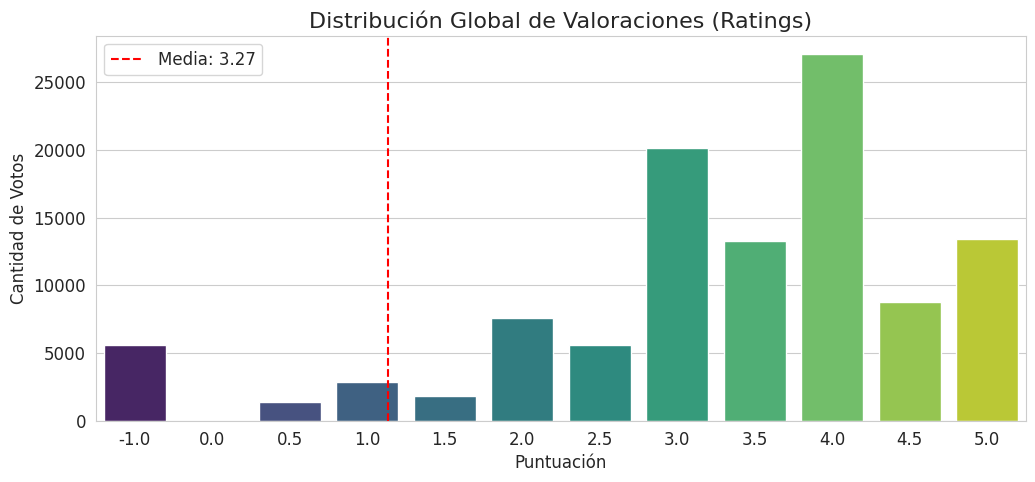

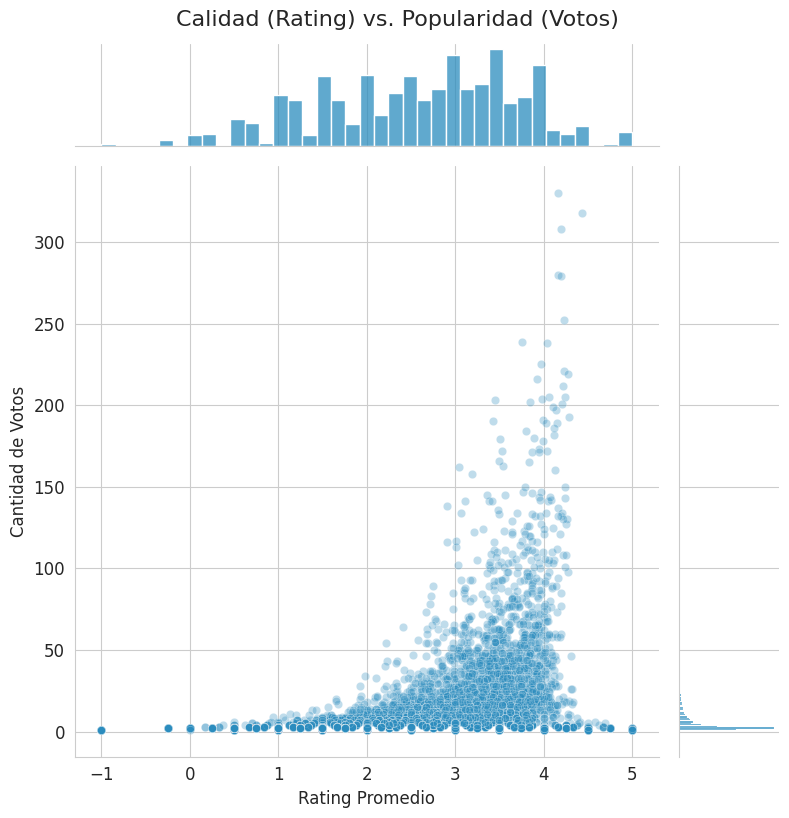

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética para gráficos profesionales
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

# Distribución Global de Ratings
# Ver si los usuarios tienden a votar alto o bajo.
plt.figure(figsize=(12, 5))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribución Global de Valoraciones (Ratings)', fontsize=16)
plt.xlabel('Puntuación')
plt.ylabel('Cantidad de Votos')
plt.axvline(df['rating'].mean(), color='red', linestyle='--', label=f'Media: {df["rating"].mean():.2f}')
plt.legend()
plt.show()

# Análisis de Popularidad vs. Calidad
# Agrupamos por película para obtener estadísticas clave
movie_stats = df.groupby('movieId').agg({'rating': ['count', 'mean']})
movie_stats.columns = ['count', 'mean']

# Visualización Jointplot: Nos permite ver outliers y concentraciones
# Interpretación: Las películas con rating 5.0 puro suelen tener 1 solo voto (ruido).
g = sns.jointplot(x='mean', y='count', data=movie_stats, kind='scatter', alpha=0.3, color='#2b8cbe', height=8)
g.fig.suptitle('Calidad (Rating) vs. Popularidad (Votos)', y=1.02, fontsize=16)
g.set_axis_labels('Rating Promedio', 'Cantidad de Votos')
plt.show()

In [10]:
rating_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193567,193571,193573,193579,193581,193583,193585,193587,193609,99999999
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
609,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Entrenamiento del Modelo con Matriz de Correlación
# Definimos un umbral de significancia estadística.
MIN_VOTES_THRESHOLD = 50

print(f"Total películas antes del filtrado: {len(movie_stats)}")
active_movies_ids = movie_stats[movie_stats['count'] >= MIN_VOTES_THRESHOLD].index
print(f"Total películas consideradas para el modelo (Popularidad > {MIN_VOTES_THRESHOLD}): {len(active_movies_ids)}")

# Filtramos la matriz de ratings original para optimizar cómputo y calidad
rating_matrix_filtered = rating_matrix[active_movies_ids]


# Calculamos la matriz de correlación entre películas.
# Un valor cercano a 1.0 indica que usuarios que vieron A también vieron B y las calificaron similar.
item_similarity_df = rating_matrix_filtered.corr(method='pearson')

print("✅ Modelo entrenado. Matriz de Similitud generada.")
display(item_similarity_df.head())

Total películas antes del filtrado: 9738
Total películas consideradas para el modelo (Popularidad > 50): 460
✅ Modelo entrenado. Matriz de Similitud generada.


movieId,1,2,3,5,6,7,10,11,16,17,...,91500,91529,96079,99114,106782,109374,109487,112852,116797,122904
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.336695,0.344006,0.291349,0.114469,0.182218,-0.015894,0.212921,-0.168676,0.214211,...,-0.060989,0.329584,-0.060154,0.341463,0.596332,0.206541,4.618904e-01,0.140773,2.944823e-01,0.351821
2,0.336695,1.000000,0.283836,0.524383,0.179966,0.335236,0.026514,0.469587,-0.297891,0.198570,...,-0.391440,0.416035,-0.044043,0.405686,0.628817,0.116395,3.217677e-01,0.425481,4.137580e-01,0.552837
3,0.344006,0.283836,1.000000,0.610494,0.218358,0.621194,-0.123753,0.143915,-0.040227,0.119138,...,0.067884,0.054233,0.116563,-0.254385,-0.175087,-0.169031,-3.651484e-01,-0.581580,3.845925e-16,-0.541736
5,0.291349,0.524383,0.610494,1.000000,0.230945,0.639458,0.160847,0.317701,0.192040,0.069075,...,-0.355849,-0.275625,-0.336336,-0.032306,0.528221,0.180021,-4.612081e-17,-0.183333,NaN,-0.137361
6,0.114469,0.179966,0.218358,0.230945,1.000000,-0.203053,0.427753,0.071072,0.521443,-0.078907,...,0.320218,0.329979,-0.149071,0.056807,0.125000,0.081111,-1.319581e-01,0.322485,-5.486728e-01,0.062224


In [12]:
# Motor de Recomendación para el Usuario 1000
def get_user_recommendations(user_id, raw_data_matrix, corr_matrix, movies_meta, n_recs=10):
    """
    Genera recomendaciones personalizadas basadas en Filtrado Colaborativo Item-Item.
    
    Estrategia:
    1. Identificar qué le gustó al usuario (Rating > 3.0).
    2. Buscar películas correlacionadas positivamente con esas elecciones.
    3. Ponderar la recomendación por cuánto le gustó la película origen.
    4. Excluir lo que el usuario ya ha visto.
    """
    
    # 1. Perfilado del Usuario
    try:
        user_ratings = raw_data_matrix.loc[user_id]
    except KeyError:
        return "Error: El usuario no existe en la matriz."

    # Filtramos solo lo que le gustó (sentimiento positivo)
    liked_movies = user_ratings[user_ratings > 3.0].dropna()
    print(f"🔍 Analizando {len(liked_movies)} películas que gustaron al usuario {user_id}...")

    # 2. Generación de Candidatos
    similar_candidates = pd.Series(dtype='float64')

    for movieId, rating in liked_movies.items():
        if movieId in corr_matrix.columns:
            # Extraemos la columna de similitudes para esa película
            sims = corr_matrix[movieId].dropna()
            
            # PONDERACIÓN:
            # Escalamos la similitud por el rating del usuario. (Una similitud fuerte basada en una película que AMAS vale más que una que solo te gustó)
            weighted_sims = sims.map(lambda x: x * rating)
            
            similar_candidates = pd.concat([similar_candidates, weighted_sims])

    # 3. Agregación y Ranking
    # Si una película es recomendada por varias fuentes, sumamos sus puntajes
    similar_candidates = similar_candidates.groupby(similar_candidates.index).sum()
    
    # Ordenamos de mayor a menor score
    similar_candidates = similar_candidates.sort_values(ascending=False)

    # 4. Filtrado de lo ya visto
    watched_indices = user_ratings.dropna().index
    final_recs = similar_candidates.drop(watched_indices, errors='ignore')

    # 5. Formato de Salida
    result_df = pd.DataFrame(final_recs.head(n_recs), columns=['score'])
    # Hacemos merge para traer el Título y Género
    result_df = result_df.merge(movies_meta, left_index=True, right_on='movieId')
    
    return result_df[['title', 'genres', 'score']]

# EJECUCIÓN FINAL
print(f"\n🎬 RECOMENDACIONES PARA EL USUARIO 1000:")
top_recs = get_user_recommendations(1000, rating_matrix, item_similarity_df, movies)

# Mostramos resultado
display(top_recs)


🎬 RECOMENDACIONES PARA EL USUARIO 1000:
🔍 Analizando 822 películas que gustaron al usuario 1000...


,title,genres,score


In [13]:
#IMPLEMENTACION PROFESIONAL
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# 1. Matriz para Item-Based Filtering
# Ahora cada fila representa el "vector de gustos" de una película específica
movie_user_matrix = df.pivot_table(index='title', columns='userId', values='rating').fillna(0)
movie_user_matrix_sparse = csr_matrix(movie_user_matrix.values)

print(f"✅ Matriz re-orientada exitosamente.")
print(f"Dimensiones: {movie_user_matrix.shape} (Debe ser: Películas x Usuarios)")

# 2. Definición del Modelo (K-Nearest Neighbors)
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(movie_user_matrix_sparse)

# 3. Función de Recomendación Corregida
def recomendar_profesional_fixed(movie_title, matrix, model, n_recs=5):
    # Verificamos si la película existe en nuestro índice
    if movie_title not in matrix.index:
        return "❌ Error: Película no encontrada en el dataset."

    # A. Buscamos el índice numérico de la fila de la película
    query_index = matrix.index.get_loc(movie_title)
    
    # B. El modelo busca los vecinos más cercanos a esa fila
    distances, indices = model.kneighbors(
        matrix.iloc[query_index, :].values.reshape(1, -1), 
        n_neighbors=n_recs+1
    )
    
    # C. Formatear salida
    recs = []
    # Empezamos en range(1, ...) porque el vecino 0 es la misma película
    for i in range(1, len(distances.flatten())):
        recommended_idx = indices.flatten()[i]
        dist = distances.flatten()[i]
        
        recs.append({
            'Title': matrix.index[recommended_idx], # Recuperamos el título del índice
            'Similarity': 1 - dist # Convertimos distancia a similitud 
         })   
    return pd.DataFrame(recs)

# EJECUCION
peli_prueba = "Matrix, The (1999)" 
print(f"🤖 Análisis de vecinos cercanos (KNN) para: '{peli_prueba}'")
try:
    display(recomendar_profesional_fixed(peli_prueba, movie_user_matrix, model_knn))
except Exception as e:
    print(f"Error: {e}")

✅ Matriz re-orientada exitosamente.
Dimensiones: (9732, 611) (Debe ser: Películas x Usuarios)
🤖 Análisis de vecinos cercanos (KNN) para: 'Matrix, The (1999)'


,Title,Similarity
0,Fight Club (1999),0.715455
1,Star Wars: Episode V - The Empire Strikes Back...,0.702557
2,Saving Private Ryan (1998),0.681318
3,Star Wars: Episode IV - A New Hope (1977),0.665148
4,Star Wars: Episode VI - Return of the Jedi (1983),0.662897
